In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from scipy.stats import fligner
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi, posthoc_nemenyi_friedman, posthoc_conover, __convert_to_block_df

# 1. Dataset

In [5]:
P1 = [25,23,24,32,32,34,21,24,27,20] 
P2 = [32,31,32,34,29,22,34,35,31,31] 
P3 = [35,46,54,32,41,42,39,36,32,37] 
P4 = [42,21,23,51,31,30,34,25,35,29] 
P5 = [35,36,25,20,23,26,29,29,21,21] 
P6 = [42,32,45,50,51,48,43,44,47,49] 
P7 = [21,43,45,43,41,43,54,53,51,54]

In [6]:
df = pd.DataFrame(list(zip(P1, P2, P3, P4, P5, P6, P7)), 
                  columns=["P1", "P2", "P3", "P4", "P5", "P6", "P7"])
df

,P1,P2,P3,P4,P5,P6,P7
0,25,32,35,42,35,42,21
1,23,31,46,21,36,32,43
2,24,32,54,23,25,45,45
3,32,34,32,51,20,50,43
4,32,29,41,31,23,51,41
5,34,22,42,30,26,48,43
6,21,34,39,34,29,43,54
7,24,35,36,25,29,44,53
8,27,31,32,35,21,47,51
9,20,31,37,29,21,49,54


# 2. Visual Analysis

## Boxplot

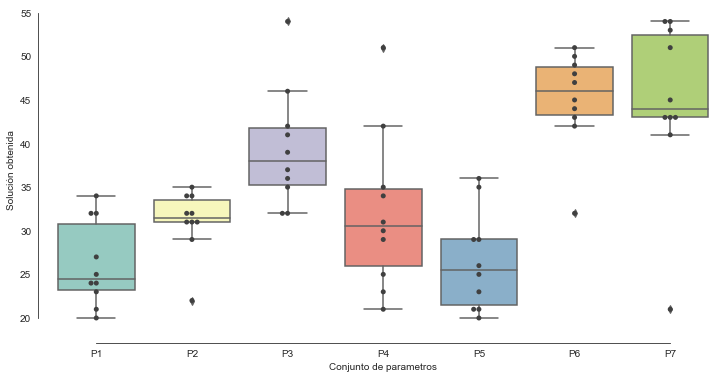

In [63]:
sns.set_style("white")
fig = plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), palette="Set3")
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(df), color=".25")
plt.ylabel("Solución obtenida")
plt.xlabel("Conjunto de parametros")
sns.despine(offset=10, trim=True)
plt.show()

In [67]:
pd.melt(df)

,variable,value
0,P1,25
1,P1,23
2,P1,24
3,P1,32
4,P1,32
...,...,...
65,P7,43
66,P7,54
67,P7,53
68,P7,51


# Distributions

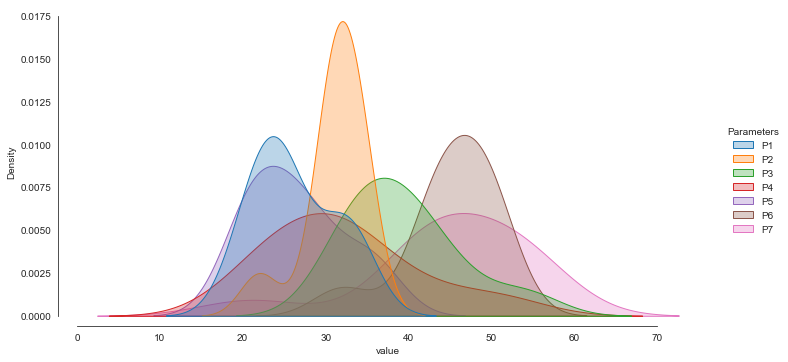

In [88]:
melted = pd.melt(df)
melted.columns = ['Parameters', 'value']

ax = sns.displot(melted, x="value", hue="Parameters",  kind="kde", fill=True, alpha=.3, aspect=2)
sns.despine(offset=10, trim=True);
plt.show()


# 3. Parametrics assumptions

## 3.1. Normality

In [10]:
def shapiroTest(x):
    '''
    Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical 
               values from the distribution of the test statistic.
    p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
    '''
    
    statistic = shapiro(x).statistic
    pvalue = shapiro(x).pvalue
    
    if pvalue > 0.05:
        print(f"The distribution is normal. The pvalue is {pvalue} and the statistics is {statistic}")
    else:
        print(f"The distribution is not normal. The pvalue is {pvalue} and the statistics is {statistic}")

In [15]:
for c in df.columns:
    statistic = shapiro(df[c]).statistic
    pvalue = shapiro(df[c]).pvalue
    
    if pvalue > 0.05:
        print(f"The distribution for {c} algorithm is Normal. The pvalue is {np.round(pvalue,2)} and the statistics is {np.round(statistic,2)}")
    else:
        print(f"The distribution for {c} algorithm is not normal. The pvalue is {np.round(pvalue,2)} and the statistics is {np.round(statistic,2)}")

The distribution for P1 algorithm is Normal. The pvalue is 0.26 and the statistics is 0.91
The distribution for P2 algorithm is not normal. The pvalue is 0.02 and the statistics is 0.81
The distribution for P3 algorithm is Normal. The pvalue is 0.31 and the statistics is 0.91
The distribution for P4 algorithm is Normal. The pvalue is 0.48 and the statistics is 0.93
The distribution for P5 algorithm is Normal. The pvalue is 0.25 and the statistics is 0.91
The distribution for P6 algorithm is Normal. The pvalue is 0.09 and the statistics is 0.87
The distribution for P7 algorithm is not normal. The pvalue is 0.02 and the statistics is 0.81


## Homocedasticity

In [60]:
F, p = fligner(df.P1, df.P2, df.P3, df.P4, df.P5, df.P6, df.P7)

print("******* Fligner-Killeen's Test *******\n")
print(f"\tStatistics: {round(F,2)}")
print(f"\tp-value: {round(p,3)}")
print("\n***********************************")

******* Fligner-Killeen's Test *******

	Statistics: 7.19
	p-value: 0.304

***********************************


## 3.2. Homocedasticity

In [26]:
L, p = levene(df.P1, df.P2, df.P3, df.P4, df.P5, df.P6, df.P7)

print("******* Levene's Test *******\n")
print(f"\tStatistics: {round(L,2)}")
print(f"\tp-value: {round(p,2)}")
print("\n***********************************")

******* Levene's Test *******

	Statistics: 1.1
	p-value: 0.38

***********************************


# 4. Non-parametric tests

## 4.1. Independent samples data

In [25]:
H, p = kruskal(df.P1, df.P2, df.P3, df.P4, df.P5, df.P6, df.P7)

print("******* Kruskal-Wallis Test *******\n")
print("\tStatistics: ", H)
print("\tp-value: ", p)
print("\n***********************************")

******* Kruskal-Wallis Test *******

	Statistics:  39.09846677426144
	p-value:  6.846432420673457e-07

***********************************


## 4.2. Indepenent samples test post hoc

In [55]:
__convert_to_block_df(df.to_numpy())[0]

,blocks,groups,y
0,0,0,25
1,1,0,23
2,2,0,24
3,3,0,32
4,4,0,32
...,...,...,...
65,5,6,43
66,6,6,54
67,7,6,53
68,8,6,51


In [58]:
nemenyi = posthoc_nemenyi(__convert_to_block_df(df.to_numpy())[0], val_col='y', group_col='groups')
nemenyi.columns = df.columns
nemenyi.index = df.columns
nemenyi

,P1,P2,P3,P4,P5,P6,P7
P1,1.000000,0.965930,0.118688,0.946241,1.000000,0.006145,0.012004
P2,0.965930,1.000000,0.675395,1.000000,0.973852,0.152881,0.225030
P3,0.118688,0.675395,1.000000,0.735947,0.134997,0.980328,0.993671
P4,0.946241,1.000000,0.735947,1.000000,0.957343,0.191540,0.274184
P5,1.000000,0.973852,0.134997,0.957343,1.000000,0.007536,0.014514
P6,0.006145,0.152881,0.980328,0.191540,0.007536,1.000000,0.999999
P7,0.012004,0.225030,0.993671,0.274184,0.014514,0.999999,1.000000


## 4.3. Dependent samples test

In [29]:
F, p = friedmanchisquare(df.P1, df.P2, df.P3, df.P4, df.P5, df.P6, df.P7)

print("******* Friedman Test *******\n")
print("\tStatistics: ", F)
print("\tp-value: ", p)
print("\n****************************")

******* Friedman Test *******

	Statistics:  32.03610108303247
	p-value:  1.605963392835356e-05

****************************


## 4.4. Dependent samples test post-hoc

In [38]:
nemenyi = posthoc_nemenyi_friedman(df.to_numpy())
nemenyi.columns = df.columns
nemenyi.index = df.columns
#nemenyi = np.round(nemenyi, 3)
nemenyi

,P1,P2,P3,P4,P5,P6,P7
P1,1.000000,0.900000,0.042827,0.777817,0.900000,0.001315,0.004459
P2,0.900000,1.000000,0.438420,0.900000,0.900000,0.049752,0.114484
P3,0.042827,0.438420,1.000000,0.656089,0.100312,0.900000,0.900000
P4,0.777817,0.900000,0.656089,1.000000,0.900000,0.129190,0.254909
P5,0.900000,0.900000,0.100312,0.900000,1.000000,0.004459,0.013555
P6,0.001315,0.049752,0.900000,0.129190,0.004459,1.000000,0.900000
P7,0.004459,0.114484,0.900000,0.254909,0.013555,0.900000,1.000000
